<a href="https://colab.research.google.com/github/Fazloussatter/Trading-Strategy-with-Python/blob/main/Trading_Strategy_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing essential libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
from datetime import date, timedelta
import warnings
warnings.filterwarnings('ignore')

#Downloading data

In [ ]:
ticker=("AAPL")
start=datetime.date(2020,1,1)
end=datetime.date.today()
apple=yf.download(ticker,start,end)

[*********************100%***********************]  1 of 1 completed


#Checking the data

In [ ]:
apple

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620850,72.681296,71.373226,71.627100,135480400
2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800
2020-01-06,72.487839,72.526526,70.783241,71.034702,118387200
2020-01-07,72.146919,72.753800,71.926892,72.497506,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200
...,...,...,...,...,...
2025-07-03,213.550003,214.649994,211.809998,212.149994,34955800
2025-07-07,209.949997,216.229996,208.800003,212.679993,50229000


#Ploting stock price with three moving average

In [ ]:
apple=pd.DataFrame(apple)
apple["MA10"]=apple["Close"].rolling(10).mean()
apple["MA20"]=apple["Close"].rolling(20).mean()
apple["MA30"]=apple["Close"].rolling(30).mean()




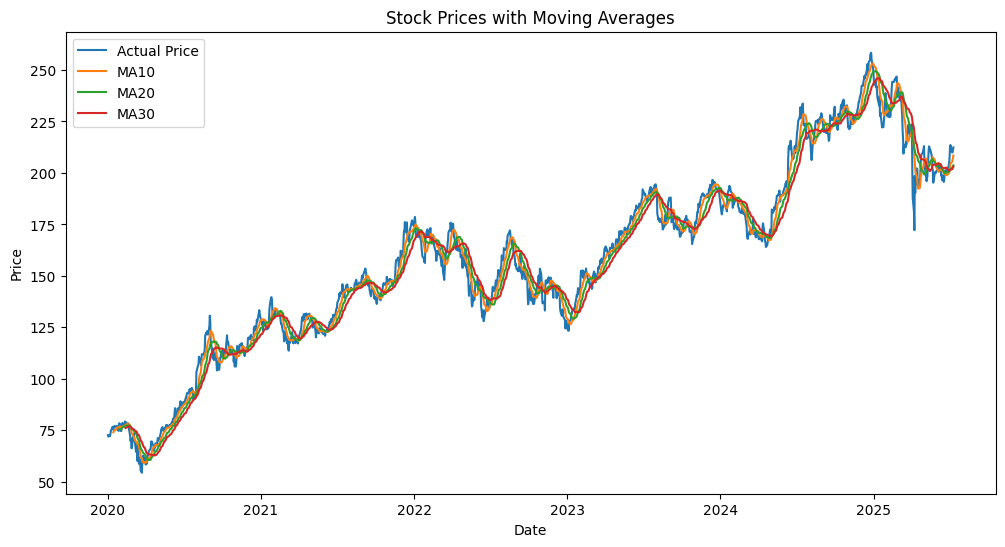

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(apple["Close"],label="Actual Price")
plt.plot(apple["MA10"],label="MA10")
plt.plot(apple["MA20"],label="MA20") # Corrected label to MA20
plt.plot(apple["MA30"],label="MA30") # Corrected label to MA30

plt.title("Stock Prices with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

#Examining the signal (Long or not)

In [ ]:

apple["share"] = np.where(
    (apple["MA10"] > apple["MA20"]) & (apple["MA20"] > apple["MA30"]),
    1,
    0
)
print(signal)

Long


#Calculating the daily profit

In [ ]:
apple["Close"]=apple["Open"].shift(-1)
apple.iloc[500:505,:]

Price,Close,High,Low,Open,Volume,MA10,MA20,MA30,share
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2021-12-27,176.829850,177.085037,173.796969,173.816588,74919600,171.545367,168.293604,163.368032,1
2021-12-28,176.015206,177.978222,175.229975,176.829850,79144300,171.893805,169.228497,164.326644,1
2021-12-29,176.152611,177.291180,174.847200,176.015206,62348900,172.389471,169.919485,165.287876,1
2021-12-30,174.798128,177.232284,174.798115,176.152611,59773000,172.281505,170.578574,166.177784,1
2021-12-31,174.542917,175.917055,173.983468,174.798128,64062300,172.802693,171.256313,166.965615,1


#Ploting the daily profit.

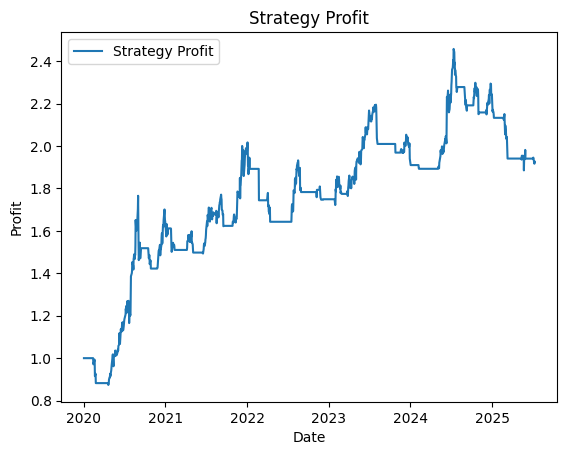

In [ ]:

# #Calculating daily profit
apple["daily_profit"]=apple["Close"].pct_change()
apple.iloc[500:505,:]
# #Calculating strategy profit
apple["strategy_profit"]=apple["daily_profit"]*apple["share"].shift(1)
apple.iloc[500:505,:]
# #Calculating the cummulative profit
apple["cummulative_strategy_profit"]=(1+apple["strategy_profit"]).cumprod()
# #Plotting the strategy
plt.plot(apple["cummulative_strategy_profit"],label="Strategy Profit")
plt.title("Strategy Profit")
plt.xlabel("Date")
plt.ylabel("Profit")
plt.legend()
plt.show()

#Calculating the commulative wealth

In [ ]:
# Assuming an initial investment of $10000

initial_investment = 10000

# Access the final cumulative wealth from the 'cumulative_wealth' column

total_money_at_end = apple["cumulative_wealth"].iloc[-1]

print("Total money at the end of the strategy period is:", total_money_at_end)
print("Initial investment was:", initial_investment)

# Calculate 'money won' as the difference between the total money at the end and the initial investment
money_won = total_money_at_end - initial_investment
print("Total money won is:", money_won)

Total money at the end of the strategy period is: 19257.978250460874
Initial investment was: 10000
Total money won is: 9257.978250460874


#Ploting the comulative wealth

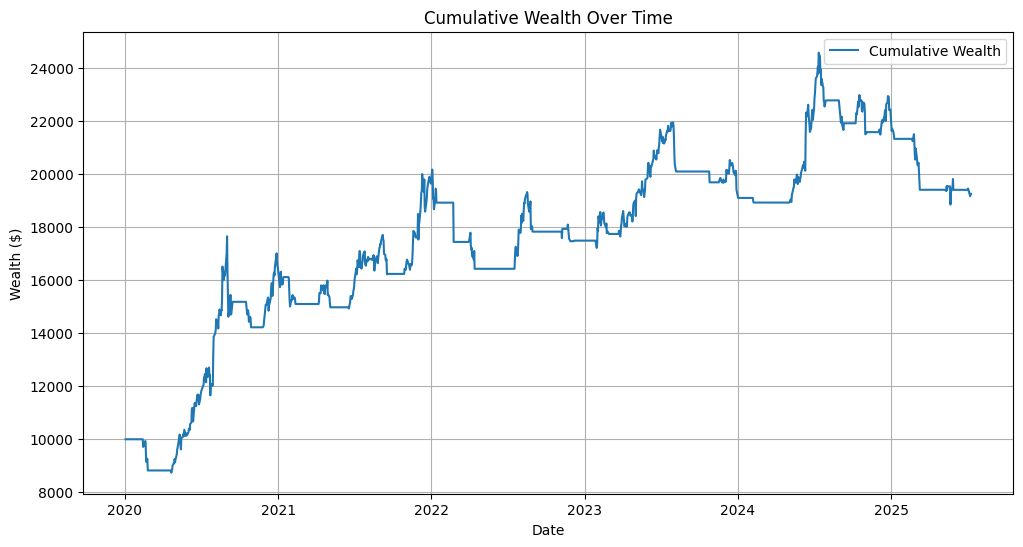

In [ ]:

# Calculating the cumulative wealth
# Assuming an initial investment of $10000
initial_investment = 10000
apple["cumulative_wealth"] = initial_investment * apple["cummulative_strategy_profit"]

# Plotting the cumulative wealth
plt.figure(figsize=(12,6))
plt.plot(apple["cumulative_wealth"], label="Cumulative Wealth")
plt.title("Cumulative Wealth Over Time")
plt.xlabel("Date")
plt.ylabel("Wealth ($)")
plt.legend()
plt.grid(True)
plt.show()

#Calculating the Relative Strength Index(RSI)

In [ ]:
def calculate_rsi(data, window=14):
    delta = data['Close_AAPL'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

apple['RSI'] = calculate_rsi(apple)

print(apple[['Close_AAPL', 'RSI']].tail(10))

            Close_AAPL        RSI
Date                             
2025-06-26  201.889999  47.798489
2025-06-27  202.009995  45.029224
2025-06-30  206.669998  62.232963
2025-07-01  208.910004  61.200839
2025-07-02  212.149994  78.450152
2025-07-03  212.679993  78.336985
2025-07-07  210.100006  77.826112
2025-07-08  209.529999  76.267595
2025-07-09  210.509995  81.414403
2025-07-10         NaN  79.368115


#Ploting the RSI values

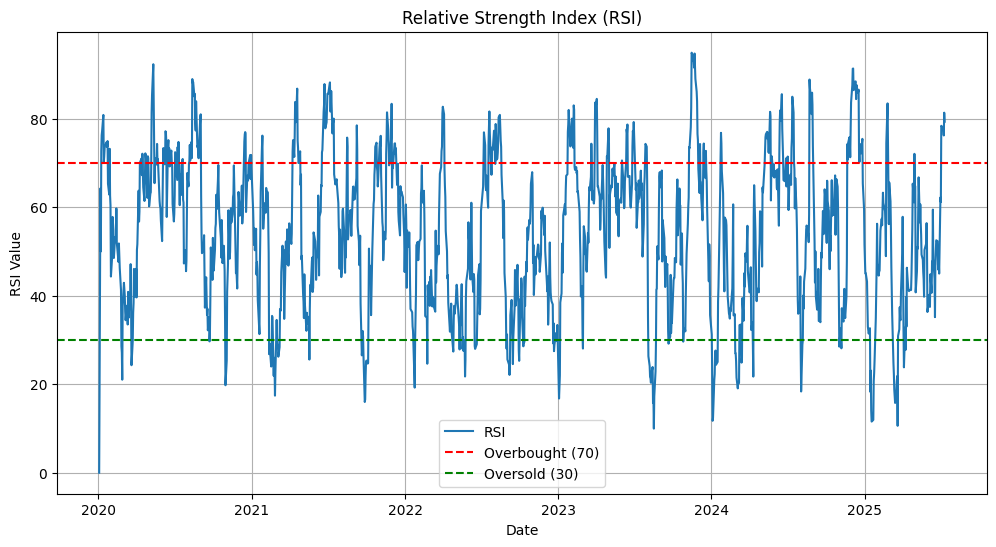

In [ ]:

# #Plotting the RSI
plt.figure(figsize=(12,6))
plt.plot(apple.index, apple['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)
plt.show()

#Recommendations

In [ ]:
# prompt: Please give us recommendations based on above data.

# #Recommendations
print("\n--- Recommendations based on Analysis ---")

# Recommendation based on the Moving Average Crossover Strategy
print("\nMoving Average (MA) Crossover Strategy Recommendation:")
last_share_signal = apple["share_"].iloc[-1]
if last_share_signal == 1:
    print("Based on the MA crossover (MA10 > MA20 > MA30), the current signal is BUY.")
elif last_share_signal == 0 and apple["share_"].iloc[-2] == 1:
     print("Based on the MA crossover, a recent SELL signal occurred.")
else:
     print("Based on the MA crossover, the current signal is NEUTRAL or HOLD.")


# Recommendation based on the Relative Strength Index (RSI)
print("\nRelative Strength Index (RSI) Recommendation:")
last_rsi = apple['RSI'].iloc[-1]
print(f"Current RSI value: {last_rsi:.2f}")
if last_rsi > 70:
    print("The stock appears to be Overbought (RSI > 70). This might suggest a potential price reversal or a time to consider selling.")
elif last_rsi < 30:
    print("The stock appears to be Oversold (RSI < 30). This might suggest a potential price increase or a time to consider buying.")
else:
    print("The stock's RSI is in the neutral range (30-70).")

# Combining recommendations (simple example)
print("\nCombined Recommendation (Simple):")
if last_share_signal == 1 and last_rsi < 70:
    print("Both MA crossover and RSI (not overbought) suggest a potential BUY or HOLD.")
elif last_share_signal == 0 and last_rsi > 30:
    print("MA crossover suggests SELL, and RSI (not oversold) does not contradict. Consider a SELL or HOLD.")
elif last_share_signal == 1 and last_rsi > 70:
     print("MA crossover suggests BUY, but RSI suggests Overbought. Exercise caution or consider a HOLD.")
elif last_share_signal == 0 and last_rsi < 30:
    print("MA crossover suggests SELL, but RSI suggests Oversold. Exercise caution or consider a HOLD/BUY depending on other factors.")
else:
    print("Based on these two indicators, the outlook is mixed or neutral. Consider other factors.")

# Note: This is a basic example combining two indicators. Real-world trading involves many more factors.
print("\nDisclaimer: These are basic recommendations based on the provided indicators and data. This is not financial advice. Always conduct your own research and consult with a financial advisor before making investment decisions.")


--- Recommendations based on Analysis ---

Moving Average (MA) Crossover Strategy Recommendation:
Based on the MA crossover (MA10 > MA20 > MA30), the current signal is BUY.

Relative Strength Index (RSI) Recommendation:
Current RSI value: 79.37
The stock appears to be Overbought (RSI > 70). This might suggest a potential price reversal or a time to consider selling.

Combined Recommendation (Simple):
MA crossover suggests BUY, but RSI suggests Overbought. Exercise caution or consider a HOLD.

Disclaimer: These are basic recommendations based on the provided indicators and data. This is not financial advice. Always conduct your own research and consult with a financial advisor before making investment decisions.
